<a href="https://colab.research.google.com/github/wujulie/ML__homework/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import numpy as np 
import pandas as pd 
from sklearn.model_selection import cross_val_score
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation ,Flatten
from keras.utils import np_utils
from keras.utils import to_categorical 
from keras.layers import LSTM
from keras.optimizers import RMSprop
import pandas_datareader.data as web
import datetime
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2020,12,15)
number='2330'
df=web.DataReader(number+'.TW','yahoo',start,end)
df.tail(5)

df.to_csv('stock.csv')

In [2]:
df=df[['Open','Low','High','Volume','Close']]
df.shape

(2690, 5)

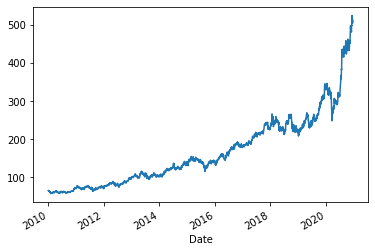

In [3]:
df.Close.plot()

In [17]:
n=1
df['return']=df['Close'].shift(-n)-df['Close']
df.tail()
df.to_csv('test.csv')

In [5]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler()
df_scaled=ss.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,index=df.index,columns=df.columns)
df_scaled['return']=df['return']
df_scaled.tail()  

,Open,Low,High,Volume,Close,return
Date,,,,,,
2020-12-10,3.671663,3.707361,3.676731,0.265490,3.686440,4.0
2020-12-11,3.735372,3.653807,3.697825,0.428151,3.728959,-8.0
2020-12-14,3.682281,3.685940,3.655638,-0.378882,3.643921,-4.0
2020-12-15,3.629189,3.643096,3.623997,0.123763,3.601401,8.0
2020-12-16,3.650426,3.675229,3.676731,0.760984,3.686440,NaN


In [6]:
'''y=pd.DataFrame(df[['return']])
y[y <= 0] = 0		  #將小於等於0的資料改為0	
y[y > 0 ]=1
print(y)'''


"y=pd.DataFrame(df[['return']])\ny[y <= 0] = 0\t\t  #將小於等於0的資料改為0\t\ny[y > 0 ]=1\nprint(y)"

In [7]:
import tqdm
n=3
feature_names=list(df_scaled.drop('return',axis=1).columns)
X=[]
y=[]
indexes=[]
df_scaled_x=df_scaled[feature_names]
for i in tqdm.tqdm_notebook(range(0,len(df_scaled)-n)):#len(df_scaled)-n
  X.append(df_scaled_x.iloc[i:i+n].values)
  y.append(df_scaled['return'].iloc[i+n-1])
  indexes.append(df_scaled.index[i+n-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [8]:
print(indexes)
print(type(indexes))
print(indexes[1725])

[Timestamp('2010-01-06 00:00:00'), Timestamp('2010-01-07 00:00:00'), Timestamp('2010-01-08 00:00:00'), Timestamp('2010-01-11 00:00:00'), Timestamp('2010-01-12 00:00:00'), Timestamp('2010-01-13 00:00:00'), Timestamp('2010-01-14 00:00:00'), Timestamp('2010-01-15 00:00:00'), Timestamp('2010-01-18 00:00:00'), Timestamp('2010-01-19 00:00:00'), Timestamp('2010-01-20 00:00:00'), Timestamp('2010-01-21 00:00:00'), Timestamp('2010-01-22 00:00:00'), Timestamp('2010-01-25 00:00:00'), Timestamp('2010-01-26 00:00:00'), Timestamp('2010-01-27 00:00:00'), Timestamp('2010-01-28 00:00:00'), Timestamp('2010-01-29 00:00:00'), Timestamp('2010-02-01 00:00:00'), Timestamp('2010-02-02 00:00:00'), Timestamp('2010-02-03 00:00:00'), Timestamp('2010-02-04 00:00:00'), Timestamp('2010-02-05 00:00:00'), Timestamp('2010-02-08 00:00:00'), Timestamp('2010-02-09 00:00:00'), Timestamp('2010-02-10 00:00:00'), Timestamp('2010-02-22 00:00:00'), Timestamp('2010-02-23 00:00:00'), Timestamp('2010-02-24 00:00:00'), Timestamp('20

In [9]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)
print(X)

(2687, 3, 5)
(2687,)
[[[-1.06409934 -1.06967687 -1.06934238  0.10042425 -1.06615129]
  [-1.06409934 -1.07074794 -1.06828772 -0.01847841 -1.07040323]
  [-1.06940849 -1.07289011 -1.07039705  0.61680452 -1.06615129]]

 [[-1.06409934 -1.07074794 -1.06828772 -0.01847841 -1.07040323]
  [-1.06940849 -1.07289011 -1.07039705  0.61680452 -1.06615129]
  [-1.06516116 -1.06753473 -1.06934238  0.24332754 -1.07359221]]

 [[-1.06940849 -1.07289011 -1.07039705  0.61680452 -1.06615129]
  [-1.06516116 -1.06753473 -1.06934238  0.24332754 -1.07359221]
  [-1.08002679 -1.07503229 -1.07672513  0.44990061 -1.07571814]]

 ...

 [[ 3.77784558  3.81446985  3.77165292  0.30516924  3.77147852]
  [ 3.67166258  3.70736137  3.67673144  0.26549018  3.68643998]
  [ 3.73537238  3.65380713  3.69782511  0.42815122  3.72895925]]

 [[ 3.67166258  3.70736137  3.67673144  0.26549018  3.68643998]
  [ 3.73537238  3.65380713  3.69782511  0.42815122  3.72895925]
  [ 3.68228088  3.68593967  3.65563778 -0.3788816   3.64392071]]

 [[

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.LSTM(200,return_sequences=True,input_shape=X[0].shape))
model.add(keras.layers.LSTM(100))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(1,kernel_initializer="uniform",activation='linear'))
adam=keras.optimizers.Adam(0.0006)
model.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 200)            164800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense (Dense)                (None, 8)                 808       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 286,017
Trainable params: 286,017
Non-trainable params: 0
_________________________________________________________________


In [11]:
y[y <= 0] = 0	
y[y > 0 ]=1	

In [12]:
date = '2015-1-1'
a=datetime.datetime.strptime(date,"%Y-%m-%d")
print(a)
b=[]
for i in indexes:
  if i<a:
    b.append(i)
#print(b)
X_train=X[:1725]
y_train=y[:1725]
get_best_model=keras.callbacks.ModelCheckpoint("lstm.mdl",monitor="val_acc")
history=model.fit(
    X_train,
    y_train,
    batch_size=1000,
    epochs=50,
    validation_split=0.2,
    callbacks=[get_best_model]
)

  



2015-01-01 00:00:00
Epoch 1/50
2/2 [==============================] - 5s 864ms/step - loss: 3.9951 - accuracy: 0.5248 - val_loss: 2.9978 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 2.3267 - accuracy: 0.5254 - val_loss: 2.7662 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 2.1215 - accuracy: 0.5248 - val_loss: 2.6496 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 2.0285 - accuracy: 0.5208 - val_loss: 2.5755 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 1.9259 - accuracy: 0.5264 - val_loss: 2.5234 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 1.8751 - accuracy: 0.5251 - val_loss: 2.4846 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 1.8046 - accuracy: 0.5308 - val_loss: 2.4548 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 8/50
2/2 [==============================] - 0s 35ms/step - loss: 1.7781 - accuracy: 0.5281 - val_loss: 2.4315 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 9/50
2/2 [==============================] - 0s 36ms/step - loss: 1.7570 - accuracy: 0.5244 - val_loss: 2.4133 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 10/50
2/2 [==============================] - 0s 39ms/step - loss: 1.7367 - accuracy: 0.5224 - val_loss: 2.3998 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 11/50
2/2 [==============================] - 0s 34ms/step - loss: 1.7070 - accuracy: 0.5224 - val_loss: 2.3941 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 12/50
2/2 [==============================] - 0s 35ms/step - loss: 1.6726 - accuracy: 0.5251 - val_loss: 2.3999 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 13/50
2/2 [==============================] - 0s 34ms/step - loss: 1.6466 - accuracy: 0.5254 - val_loss: 2.3978 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 14/50
2/2 [==============================] - 0s 35ms/step - loss: 1.6058 - accuracy: 0.5304 - val_loss: 2.4116 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 15/50
2/2 [==============================] - 0s 36ms/step - loss: 1.6064 - accuracy: 0.5238 - val_loss: 2.4284 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 16/50
2/2 [==============================] - 0s 38ms/step - loss: 1.5733 - accuracy: 0.5281 - val_loss: 2.4468 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 17/50
2/2 [==============================] - 0s 39ms/step - loss: 1.5632 - accuracy: 0.5238 - val_loss: 2.4828 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 18/50
2/2 [==============================] - 0s 36ms/step - loss: 1.5358 - accuracy: 0.5264 - val_loss: 2.4857 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 19/50
2/2 [==============================] - 0s 43ms/step - loss: 1.5086 - accuracy: 0.5278 - val_loss: 2.5454 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 20/50
2/2 [==============================] - 0s 35ms/step - loss: 1.4805 - accuracy: 0.5294 - val_loss: 2.5498 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 21/50
2/2 [==============================] - 0s 39ms/step - loss: 1.4828 - accuracy: 0.5214 - val_loss: 2.5772 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 22/50
2/2 [==============================] - 0s 36ms/step - loss: 1.4326 - accuracy: 0.5314 - val_loss: 2.6434 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 23/50
2/2 [==============================] - 0s 38ms/step - loss: 1.4292 - accuracy: 0.5241 - val_loss: 2.6899 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 24/50
2/2 [==============================] - 0s 38ms/step - loss: 1.4056 - accuracy: 0.5241 - val_loss: 2.7069 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 25/50
2/2 [==============================] - 0s 36ms/step - loss: 1.3972 - accuracy: 0.5184 - val_loss: 2.7211 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 26/50
2/2 [==============================] - 0s 38ms/step - loss: 1.3455 - accuracy: 0.5278 - val_loss: 2.7537 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 27/50
2/2 [==============================] - 0s 367ms/step - loss: 1.3279 - accuracy: 0.5254 - val_loss: 2.8037 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 28/50
2/2 [==============================] - 0s 37ms/step - loss: 1.3147 - accuracy: 0.5204 - val_loss: 2.8174 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 29/50
2/2 [==============================] - 0s 34ms/step - loss: 1.2828 - accuracy: 0.5231 - val_loss: 2.8319 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 30/50
2/2 [==============================] - 0s 42ms/step - loss: 1.2524 - accuracy: 0.5258 - val_loss: 2.8350 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 31/50
2/2 [==============================] - 0s 35ms/step - loss: 1.2227 - accuracy: 0.5251 - val_loss: 2.8622 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 32/50
2/2 [==============================] - 0s 366ms/step - loss: 1.2011 - accuracy: 0.5224 - val_loss: 2.8607 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 33/50
2/2 [==============================] - 0s 38ms/step - loss: 1.1696 - accuracy: 0.5238 - val_loss: 2.8863 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 34/50
2/2 [==============================] - 0s 34ms/step - loss: 1.1350 - accuracy: 0.5264 - val_loss: 2.9743 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 35/50
2/2 [==============================] - 0s 39ms/step - loss: 1.1111 - accuracy: 0.5228 - val_loss: 2.9710 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 36/50
2/2 [==============================] - 0s 36ms/step - loss: 1.0794 - accuracy: 0.5228 - val_loss: 3.0021 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 37/50
2/2 [==============================] - 0s 391ms/step - loss: 1.0444 - accuracy: 0.5274 - val_loss: 3.0312 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 38/50
2/2 [==============================] - 0s 35ms/step - loss: 1.0183 - accuracy: 0.5244 - val_loss: 3.0329 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 39/50
2/2 [==============================] - 0s 35ms/step - loss: 0.9916 - accuracy: 0.5228 - val_loss: 3.0210 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 40/50
2/2 [==============================] - 0s 35ms/step - loss: 0.9645 - accuracy: 0.5211 - val_loss: 3.0429 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 41/50
2/2 [==============================] - 0s 39ms/step - loss: 0.9323 - accuracy: 0.5279 - val_loss: 3.0266 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 42/50
2/2 [==============================] - 0s 367ms/step - loss: 0.9011 - accuracy: 0.5296 - val_loss: 3.0146 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 43/50
2/2 [==============================] - 0s 35ms/step - loss: 0.8888 - accuracy: 0.5257 - val_loss: 3.0080 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 44/50
2/2 [==============================] - 0s 35ms/step - loss: 0.8580 - accuracy: 0.5275 - val_loss: 2.9887 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 45/50
2/2 [==============================] - 0s 38ms/step - loss: 0.8507 - accuracy: 0.5218 - val_loss: 2.9693 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 46/50
2/2 [==============================] - 0s 39ms/step - loss: 0.8287 - accuracy: 0.5288 - val_loss: 2.9503 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 47/50
2/2 [==============================] - 0s 371ms/step - loss: 0.8086 - accuracy: 0.5350 - val_loss: 2.9132 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 48/50
2/2 [==============================] - 0s 35ms/step - loss: 0.8096 - accuracy: 0.5206 - val_loss: 2.8917 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 49/50
2/2 [==============================] - 0s 36ms/step - loss: 0.7956 - accuracy: 0.5117 - val_loss: 2.8525 - val_accuracy: 0.5043


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


Epoch 50/50
2/2 [==============================] - 0s 35ms/step - loss: 0.7928 - accuracy: 0.5083 - val_loss: 2.8316 - val_accuracy: 0.5072


INFO:tensorflow:Assets written to: lstm.mdl/assets


INFO:tensorflow:Assets written to: lstm.mdl/assets


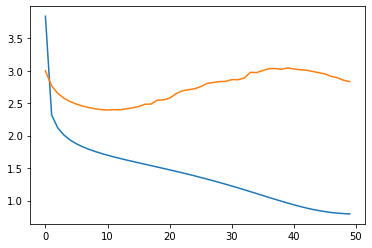

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


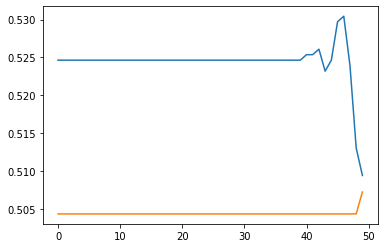

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


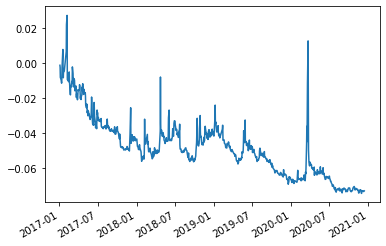

In [15]:
X_test=X[1725:-1]
y_test=y[1725:-1]
y_pred=model.predict(X_test)
y_pred=pd.Series(y_pred.reshape(-1),index=indexes[1725:-1])
y_pred.plot()

In [16]:
print(model.evaluate(X_train, y_train))
model.evaluate(X_test, y_test)

54/54 [==============================] - 0s 3ms/step - loss: 1.1989 - accuracy: 0.5096
[1.1989227533340454, 0.5095652341842651]
31/31 [==============================] - 0s 3ms/step - loss: 7.6824 - accuracy: 0.5005


[7.6824469566345215, 0.5005202889442444]